## 1. Análisis inicial de los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# conda install -c conda-forge pandas-profiling

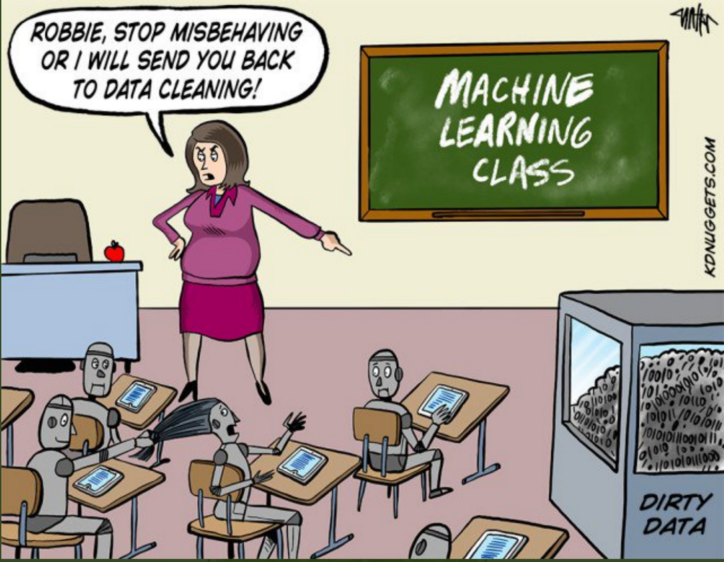

In [2]:
from IPython.display import Image
Image(filename='images/Image.png')

In [3]:
import os
ruta = os.path.join("datasets", "titanic.csv")
fichero = open(ruta)
data = pd.read_csv(ruta)
fichero.close()
data.head()

data_copy = data.copy()

In [4]:
data.describe()

Unnamed: 0       pclass     survived          age        sibsp  \
count  1309.000000  1309.000000  1309.000000  1046.000000  1309.000000   
mean    654.000000     2.294882     0.381971    29.881135     0.498854   
std     378.020061     0.837836     0.486055    14.413500     1.041658   
min       0.000000     1.000000     0.000000     0.166700     0.000000   
25%     327.000000     2.000000     0.000000    21.000000     0.000000   
50%     654.000000     3.000000     0.000000    28.000000     0.000000   
75%     981.000000     3.000000     1.000000    39.000000     1.000000   
max    1308.000000     3.000000     1.000000    80.000000     8.000000   

             parch         fare        body  
count  1309.000000  1308.000000  121.000000  
mean      0.385027    33.295479  160.809917  
std       0.865560    51.758668   97.696922  
min       0.000000     0.000000    1.000000  
25%       0.000000     7.895800   72.000000  
50%       0.000000    14.454200  155.000000  
75%       0.000000    31.275000  256.000000  
max       9.000000   512.329200  328.000000

In [ ]:
data.describe()["pclass"][1]

In [ ]:
data.describe(include = "all")

#data.describe(include = "all").transpose()

# unique: cantidad de valores únicos.
# top: valor único con más repeticiones.
# freq: cantidad de veces que aparece el valor más repetido.

In [ ]:
data["home.dest"].describe()['top'], data["age"].describe()['mean']

In [ ]:
data.dtypes

In [ ]:
data.isnull().sum()

In [ ]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [ ]:
data.info()

In [ ]:
data.shape, data.size

In [ ]:
data.corr()

#### Separar columnas numéricas del resto

In [ ]:
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values

data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values

print("Columnas numéricas: ")
print(numeric_cols)
print("\n")
print("Columnas NO numéricas: ")
print(non_numeric_cols)


## 2. Análisis exploratorio con pandas profiling

In [ ]:
# Se pueden generar los reportes mediante dos interfaces: widgets y HTML report
# El principal inconveniente es el timpo que tarda en generar el reporte
# Para grandes cantidades de datos, conviene seleccionar las variables que más nos interesen.


from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from ipywidgets import widgets

In [ ]:
# Generate the Profiling Report
profile = ProfileReport(
    data, title="Titanic Dataset", html={"style": {"full_width": True}}, sort=None
)

In [ ]:
profile.to_widgets()

In [ ]:
profile.to_notebook_iframe()

In [ ]:
data.sample(10)

In [ ]:
profile.to_file("your_report.html")

# As a string
json_data = profile.to_json()

# As a file
profile.to_file("your_report.json")

## 3. Missing values

**Encontrar los valores faltantes**

In [ ]:
# Valores nulos por columna
print(data.isnull().sum())

# Cantidad valores nulos
print(data.isnull().sum().sum())

# numero de no nulos por fila
print(data.count(axis=1))

# Número de nulos por fila
print(data.shape[1] - data.count(axis=1))

In [ ]:
# Filtro de las filas con valores faltantes
data[data.isnull().any(1)]

In [ ]:
# Nos podemos crear un mapa de calor de los datos faltantes
# Los amarillos serían los valores faltantes de cada variable

cols = data.columns 
colours = ['#5A9', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

**Eliminar datos si hay valores faltantes**

In [ ]:
# Si optaramos por borrar

# data.dropna(how="any") #Borra todas las filas en las que hay al menos un vacío
# data.dropna(how="all") # Borra las filas que tienen todo vacío
# data.dropna(thresh=2) # Conserva las filas que tienen al menos dos valores vacíos
# data.dropna(subset= ["boat"]) # Elimina las filas que tienen boat vacío
# data.dropna(axis="columns", how="any") # Elimina columnas con al menos un vacío

In [ ]:
data["age_mean"]=data["age"]
data

# Se puede rellenar los valores faltantes con la media
data["age_mean"].fillna(np.mean(np.mean(data["age_mean"])),inplace=True)
data[data["age"].isnull()]

# Se puede rellenar los valores faltantes con un valor concreto
# data["age_mean"].fillna(18,inplace=True)
data.head(15)

In [ ]:
# En series temporales (el valor más próximo o parecido suele ser el anterior/posterior), no conviene
# rellenar con la media, se suele hacer con un par de métodos que rellenan el valor anterior o el posterior

# Method to use for filling holes in reindexed Series 
# pad / ffill: propagate last valid observation forward to next valid 
# backfill / bfill: use next valid observation to fill gap.

#under_age['Age'] = np.nan

#data.drop("age_ffill", axis=1, inplace=True)
#data.drop("age_bfill", axis=1, inplace=True)

data["age_ffill"] = data["age"]
data["age_bfill"] = data["age"]

data["age_ffill"].fillna(method="ffill", inplace=True)

data["age_bfill"].fillna(method="bfill",inplace=True)
data.head(15)


In [ ]:
data[data["age"].isnull()]

**sklearn.impute.SimpleImputer**

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
#data.drop("age_imputer",axis=1, inplace=True)
data["age_imputer"] = data["age"]

#imp_mean.fit(data["age_imputer"].reshape(-1,1))


data['age_imputer']=pd.DataFrame(imp_mean.fit_transform(data["age_imputer"].values.reshape(-1, 1)))

data['age_imputer'].isna().sum()

**Imputación de Regresión --> IterativeImputer**


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#data.drop("age_regresion",axis=1, inplace=True)
data["age_regresion"] = data["age"]

reg_imputer = IterativeImputer(max_iter=10, random_state=123)

data['age_regresion']=pd.DataFrame(reg_imputer.fit_transform(data["age_regresion"].values.reshape(-1,1)))

data['age_regresion'].isna().sum()



In [ ]:
data['age_regresion'].unique()

**Imputación Knn**

In [ ]:
data["age_knn"] = data["age"]

In [ ]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)

knn_imputer.fit(data["age_knn"].values.reshape(-1,1))

knn_imputer.transform(data["age_knn"].values.reshape(-1,1))

#data['age_knn']=pd.DataFrame(knn_imputer.fit_transform(data["age_knn"].values.reshape(-1,1)))
data['age_knn'].isna().sum()

**Con strings se pueden reemplazar los datos nan con el valor que se repite con más frecuencia**

In [ ]:
data.describe(include="all")

print(data["home.dest"].value_counts().idxmax())
print(data["home.dest"].isnull().sum())

data["home.dest"] = data["home.dest"].fillna(data["home.dest"].value_counts().idxmax())
print(data["home.dest"].isnull().sum())



In [ ]:
#data["home.dest"].value_counts()
data.isnull().sum()

## 4. Valores duplicados

In [1]:
serie = pd.Series(['a','b','c','a','c','a','g'])
serie.duplicated()

NameError: name 'pd' is not defined

In [ ]:
df = all_dataset
df
# eliminar
# Eliminación de los duplicados en una columna definida
df2 = df.drop_duplicates(subset="Gender", keep='last', inplace=False)
display(df2)

## 5. Tratamiento de outliers

Los outliers o caso atípicos son datos muy diferentes a los demás, debens er contemplados en el contexto del del análisis, pero no siempre se pueden clasificar como buenos o malos.

Se suele establecer un umbral para clasificar las observaciones como outliers o no.

Pueden ser datos observados o datos que se deben a un error.

El problema viene cuando distorsionan de forma problemática el comportamiento del análisis o de los modelos. 
Incrementan la varianza, y si no están distribuidos aleatoriamente pueden reducir la normalidad de la muestra.
También distorsionan el coeficiente de correlación, media, desviación estándar... y en consecuencia todos los análisis estadísticos que las utilizan

Hay varios métodos para reconocerlos, algunos útiles son: 
- Visualizaciones: boxplot, scatterplot, histograma
- Estadísticos: Z score 
    - Para muestras pequeñas +,-2,5 veces z
    - Para muestras grandes +,-3 veces z
- Estadísticos: IQR
    - 1,5 veces IQR
    - Cuando supera +-3IQR se consideran **outliers extremos**
- EllipticEnvelope 
    
**el algoritmo de envolvente elíptica** crea superficies elípticas en torno a la nube de puntos, y cuanto más alejados están los puntos de dicha nube, mayor probabilidad de que sean outliers. 

Para construir las superficies elípticas, loa datos se van a centrar (con respecto a la mediana, resta) y escalar (con respecto al IQR, división).


**Outliers: To Drop or Not to Drop**


- Si el se trata de un error se puede borrar sin impacto (edad de 200 años)
- Investigar la naturaleza del error antes de tomar la decisión
- Antes de borralos habría que analizar el conjunto de datos con y sin outliers
- Si el oultlier no cambia el resultado pero afecta a tus asunciones, se podría borrar (asunciones x ej de que es normal)
- Si cambiaran ambos, se debería hacer el estudio con y sin outliers e indicar ambos resultados
- Si el outlier crea una asociación significativa, se debería de borrar
- Se puede probar con transformaciones de los datos: logarítmica, raíz cuadrada...

In [ ]:
# Dibujamos boxplot para visualizar outliers

data_numeric = data.select_dtypes(include=[np.number])
columns = data_numeric.columns.values
print(columns)


order = columns = data_numeric.columns.values

sns.boxplot(data=data_numeric)


In [ ]:
# Como en el caso de fare los outliers son muy grandes, no nos permiten ver bien el resto de variables, 
# por lo que los filtramos para visualizar mejor el resto de variables

data_numeric_msk = data_numeric[data_numeric['fare'] < 500]
sns.boxplot(data=data_numeric_msk)

In [ ]:
data_numeric.columns.values

In [ ]:
# Se rellenan los valors de fare con la media, porque si no nos va a delvolver Nans a la hora de calcular el 
# valor z
data["fare"].fillna(np.mean(np.mean(data["fare"])),inplace=True)
data["fare"].isnull().sum()

In [ ]:
data_numeric.head()

In [ ]:
from scipy import stats
import numpy as np


data_numeric = data.select_dtypes(include=[np.number])
data_numeric.drop(['Unnamed: 0','age_imputer','age_regresion','age_knn'], axis=1, inplace=True)
z = pd.DataFrame(np.abs(stats.zscore(data_numeric)), columns=['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body',
       'age_mean', 'age_ffill', 'age_bfill'])
print(z)
print(z.shape)


In [ ]:
# Este resultado nos devuelve los índices no el resultado!!!
np.where(z["fare"]>=3)

In [ ]:
z["fare"][0],z["fare"][10],z["fare"][11], z["fare"][16]

In [ ]:
data["fare"][0],data["fare"][10],data["fare"][11], data["fare"][16], data["fare"].mean()

In [ ]:
# Python Oulier detection -- Mas de 30 algoritmos para detectar outliers

#!pip install pyod  
# pip install --upgrade pyod
from pyod.models.knn import KNN
import pandas as pd
 

clf = KNN(contamination=0.18)
clf.fit(data_numeric.fare)
y_pred = clf.predict(np.isnan(data_numeric.fare).any())
data_numeric[y_pred == 1]
 



In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
         'Lower Bound':lower_bound,
         'percentage outliers':pros,
         'total outliers': len(f)}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

#for column in columns:

data_numeric["age"].fillna(np.mean(data_numeric["age"]), inplace=True)

print("Estudio de los outliers de la variable age")
print(outliers(data_numeric["age"]))
print("Estudio de los outliers de la variable sibsp")
print(outliers(data_numeric["sibsp"]))
print("Estudio de los outliers de la variable parch")
print(outliers(data_numeric["parch"]))
print("Estudio de los outliers de la variable fare")
print(outliers(data_numeric["fare"]))

In [ ]:
data[columns[2]]

In [ ]:
data[(data["age"]>=54.5) | (data["age"]<=2.5)]

### EllipticEnvelope

An object for detecting outliers in a Gaussian distributed dataset.

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
# data_numeric.isnull().sum()
#data_numeric["age"].fillna(np.mean(data_numeric["age"]), inplace=True)
#data_numeric["body"].fillna(np.mean(data_numeric["body"]), inplace=True)

In [ ]:
outlier_method = EllipticEnvelope(random_state=42).fit(data_numeric)

# Los scores_pred dan una puntuación por fila
scores_pred = outlier_method.decision_function(data_numeric)
threshold = stats.scoreatpercentile(scores_pred, 25)
threshold

In [ ]:
# Ratio de outliers.
print("%.3f %%" % (100*len(scores_pred[scores_pred < threshold])/len(scores_pred)))

In [ ]:
plt.boxplot(scores_pred, whis=3, vert=False)
plt.title("Boxplot")
plt.show()

In [ ]:
# Fijamos los umbrales
Q1 = stats.scoreatpercentile(scores_pred, 25)
Q3 = stats.scoreatpercentile(scores_pred, 75)
IQR = Q3 - Q1

# Valores atípicos, valores extremos sería a partir de 3
lim_inf = Q1 - 3*IQR
lim_sup = Q3 + 3*IQR

print("El límite inferior es: ", lim_inf)
print("El límite superior es: ", lim_sup)

In [ ]:
# Estimación outliers
# Se busca la posición para proceder a la eliminación de outliers

pos_i = np.where(scores_pred<=lim_inf)
pos_s = np.where(scores_pred>=lim_sup)

print("Posición de los outliers en el extremo inferior: ", pos_i)
print("Posición de los outliers en el extremo superior: ", pos_s)

In [ ]:
# Se eliminan las instancias con outliers extremos

df1.drop([417, 423, 449],axis=0,inplace=True)
df1.shape

## 6. Normalización

La normalización de datos tiene por objetivo ajustar valores medidos en diferentes escalas a una escala común.
Se recomienda en datos de entrada de ML, ya que otorga la misma importancia o peso a todas la variables.
Se aplica a las columnas con valores numéricos.

Algunos métodos (Pandas) son:

- Escala de función única: se convierte cada variable en un valor comprendido entre 0 y 1 dividendo por el máximo
- Mínimo-Máximo: se convierte cada variable en un valor comprendido entre 0 y 1 calculando la diferencia entre el valor observado y el valor mínimo y diviendo entre el rango (max-min)
- Puntuación Z: transformar los valores a valores estándar, restando a la observación el valor de la media y dividiendo entre la desviación estándar

- Recorte: limitar los valores con un máximo y un mínimo para que no superen ese umbral

In [ ]:

def unique_fun(df_input):
    return df_input.apply(lambda x: ((x)/(x.max())))

def minmax_norm(df_input):
    return (df_input - df_input.min()) / (df_input.max() - df_input.min())

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)


**Normalización con scikit-learn**

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

- Min-Max Scaler
- Abs Mean Scaler
- StandardScaler: Standardize features by removing the mean and scaling to unit variance z = (x - u) / s

In [ ]:
# Min-Max Scaler

from sklearn import preprocessing
import numpy as np
 
x = np.random.randint(0,20,9).reshape(3,3)
x_copy= x
print(x)
 
min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(x)
print(x_minmax)
print(type(x))

In [ ]:
minmax_norm(x_copy)

In [ ]:
# Max abs scaler

max_abs_scaler = preprocessing.MaxAbsScaler()
x_train_maxsbs = max_abs_scaler.fit_transform(x_copy)
x_train_maxsbs

# Ejercicios

In [ ]:
# Análisis exploratorio de los datos
# Análisis y tratamiento de valores faltantes
# Normalización de los datos